In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Dataset.csv") # reading the csv file
df

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Null values

In [5]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### Duplicate Values

In [8]:
df.duplicated().value_counts()     # No duplicates found

False    9578
dtype: int64

# Outlier Analysis

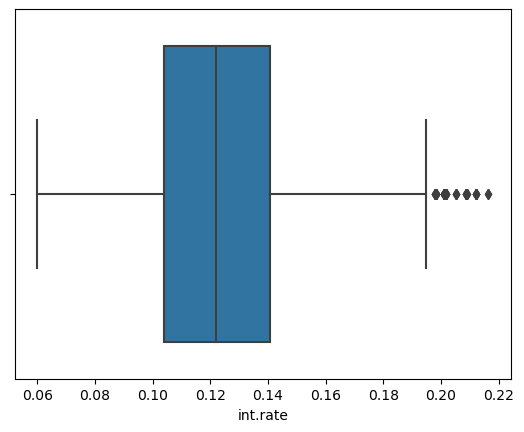

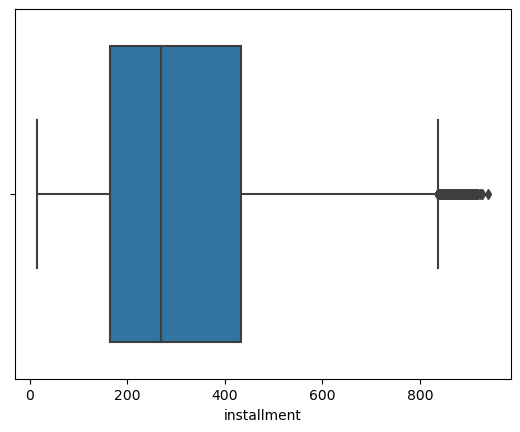

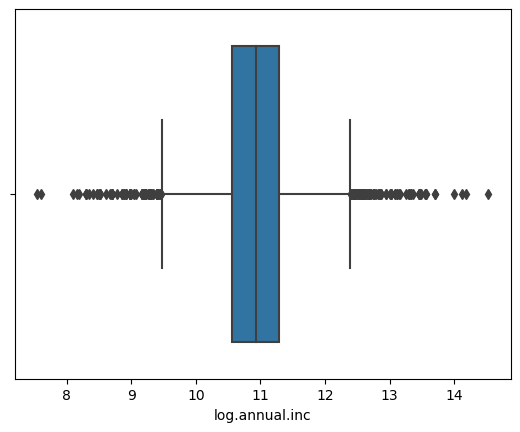

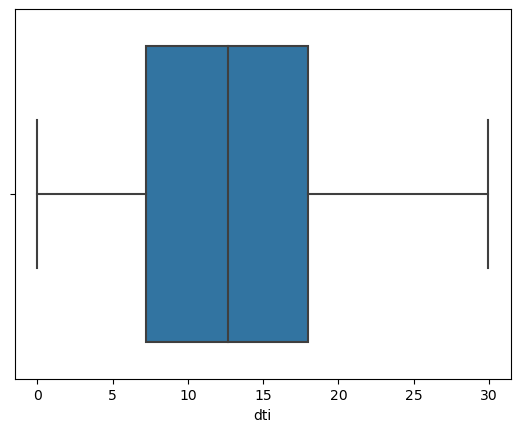

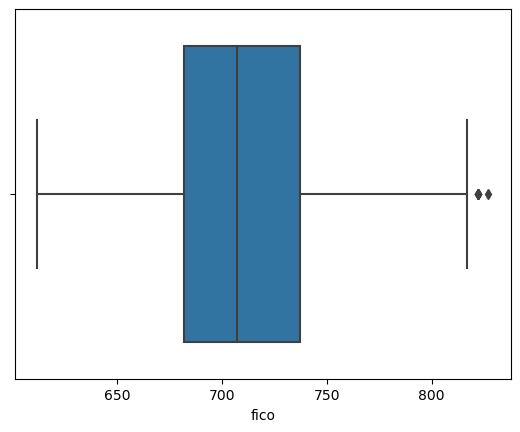

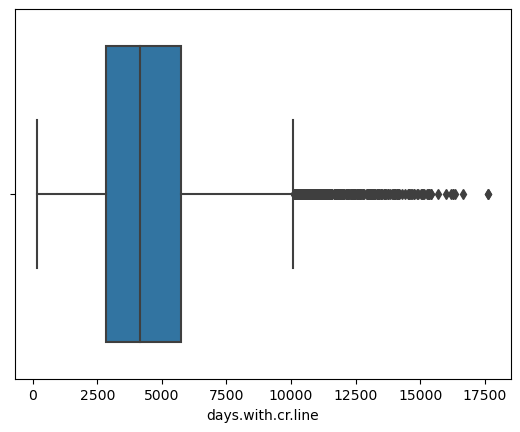

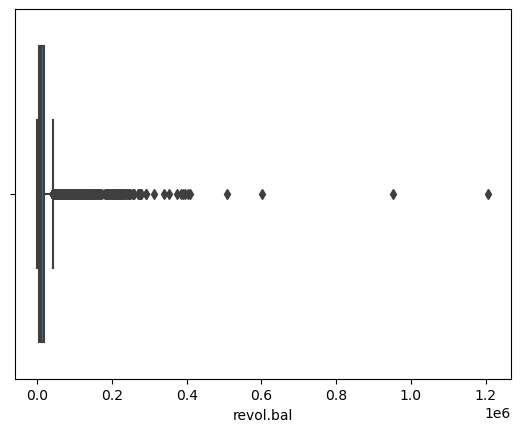

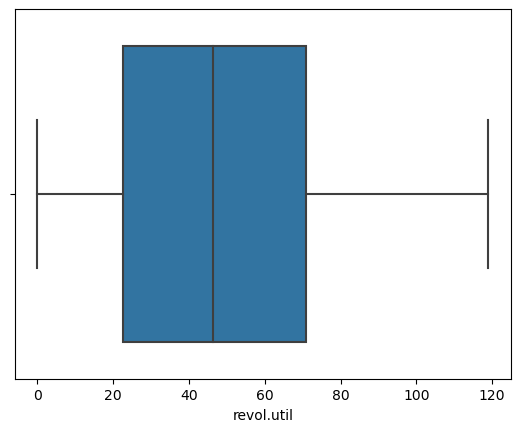

In [6]:
numerical_columns = ['int.rate','installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line',
                     'revol.bal', 'revol.util']
categorical_columns = ['credit.policy','purpose','pub.rec', 'inq.last.6mths', 'delinq.2yrs', 'not.fully.paid']
for col in numerical_columns:
    sns.boxplot(x=col,data=df)
    plt.show()

Not much outlier. annual income of few will be low and few will be high. SO, nothing to do with 'log.annual.inc'
'days.with.cr.line' can have higher value for some customer. SO, no action performed on outlier

# EDA

In [10]:
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

## Univariate Anlaysis

## Continuous Data - Histogram or KDE

Skew 0.16441991354447316


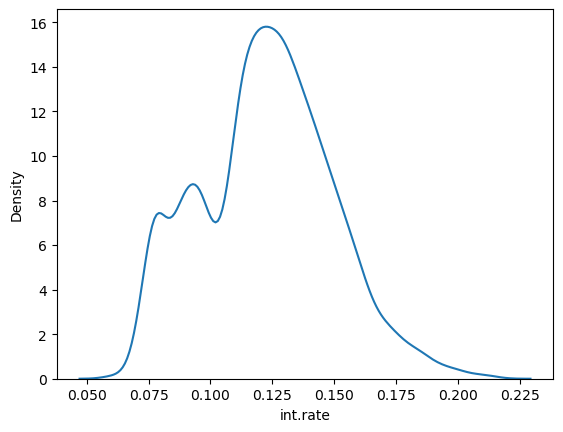

################################################## 

Skew 0.9125224624010233


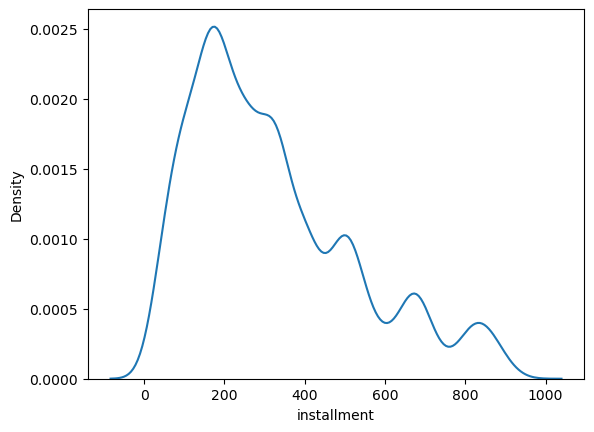

################################################## 

Skew 0.028668106570220064


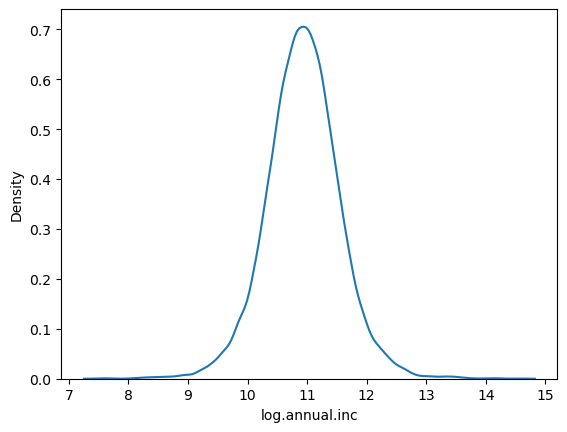

################################################## 

Skew 0.023941022949340144


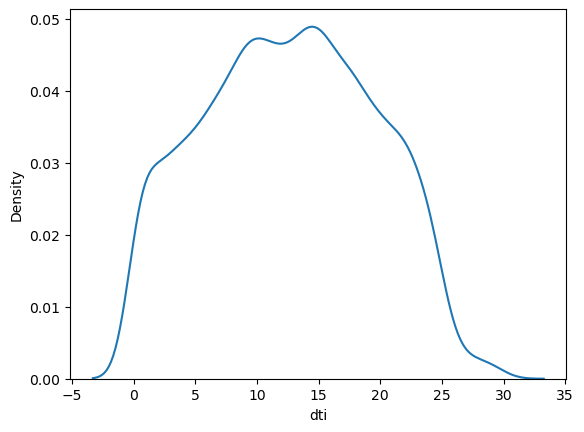

################################################## 

Skew 0.4712597399323796


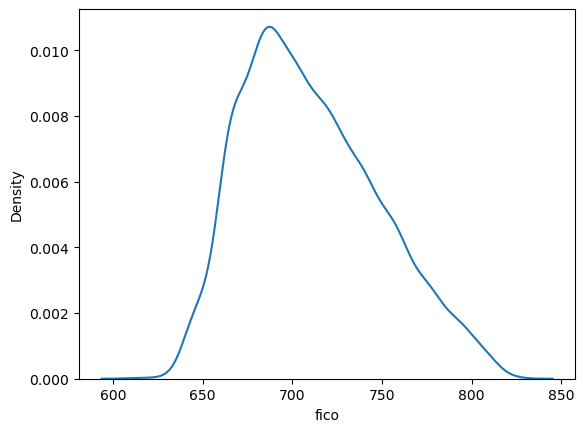

################################################## 

Skew 1.1557482270969546


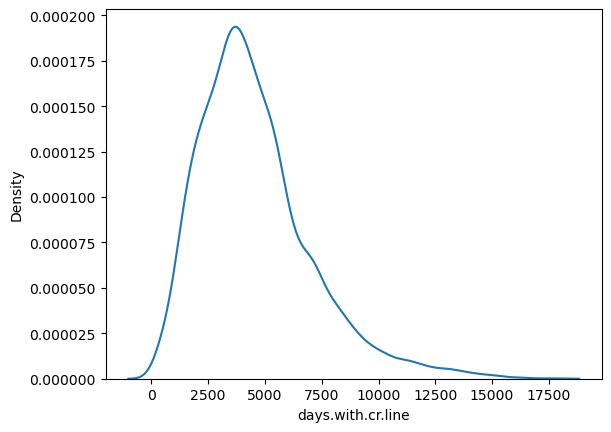

################################################## 

Skew 11.161058494625456


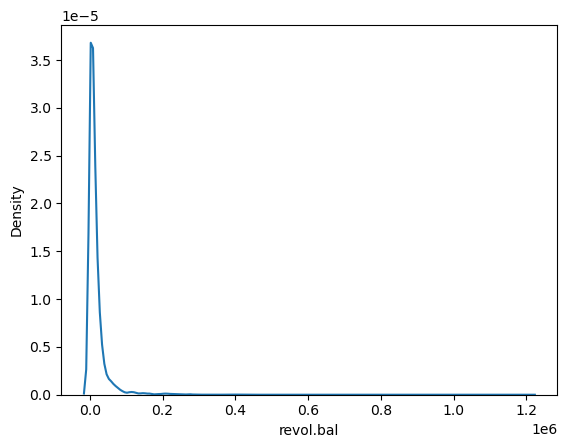

################################################## 

Skew 0.05998544258288086


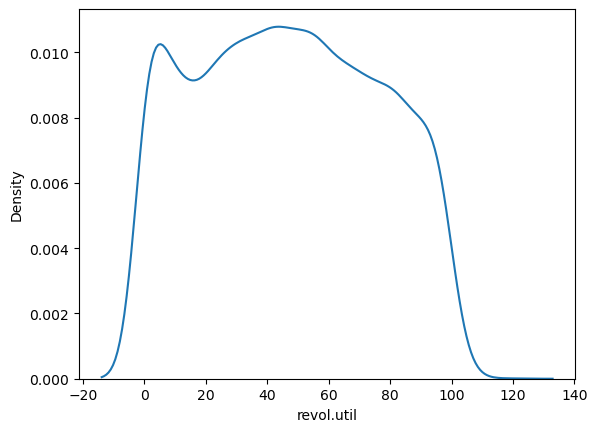

################################################## 



In [13]:
for col in numerical_columns:
    print("Skew",df[col].skew())
    sns.kdeplot(x=col,data=df)
    plt.show()
    print("#"*50,"\n")

In [14]:
for col in numerical_columns:
    print(col,":",df[col].skew())

int.rate : 0.16441991354447316
installment : 0.9125224624010233
log.annual.inc : 0.028668106570220064
dti : 0.023941022949340144
fico : 0.4712597399323796
days.with.cr.line : 1.1557482270969546
revol.bal : 11.161058494625456
revol.util : 0.05998544258288086


installment, fico , days.with.cr.line, revol.bal, inq.last.6mths, delinq.2yrs  are right skewed


# Categorical Data - Bar graphs

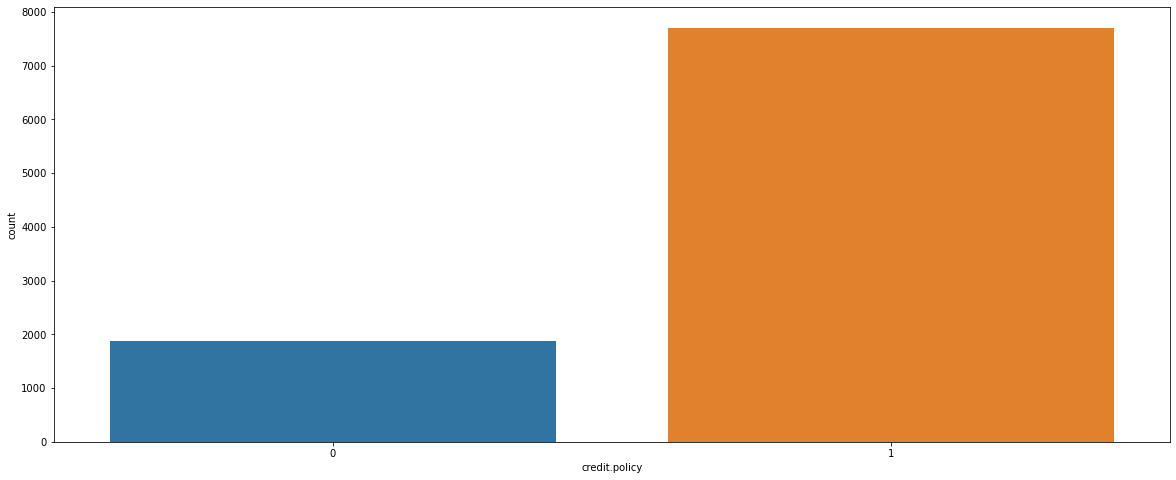

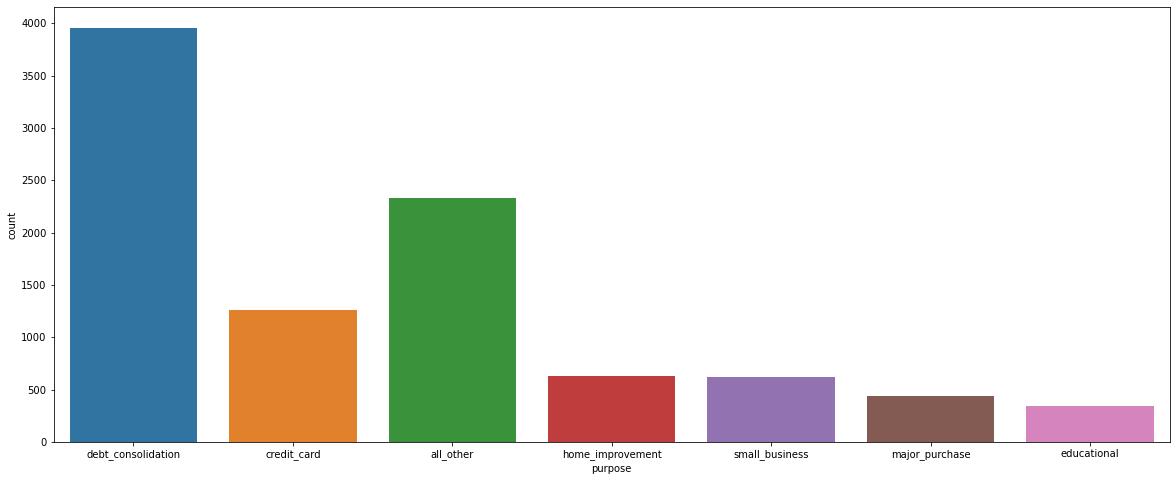

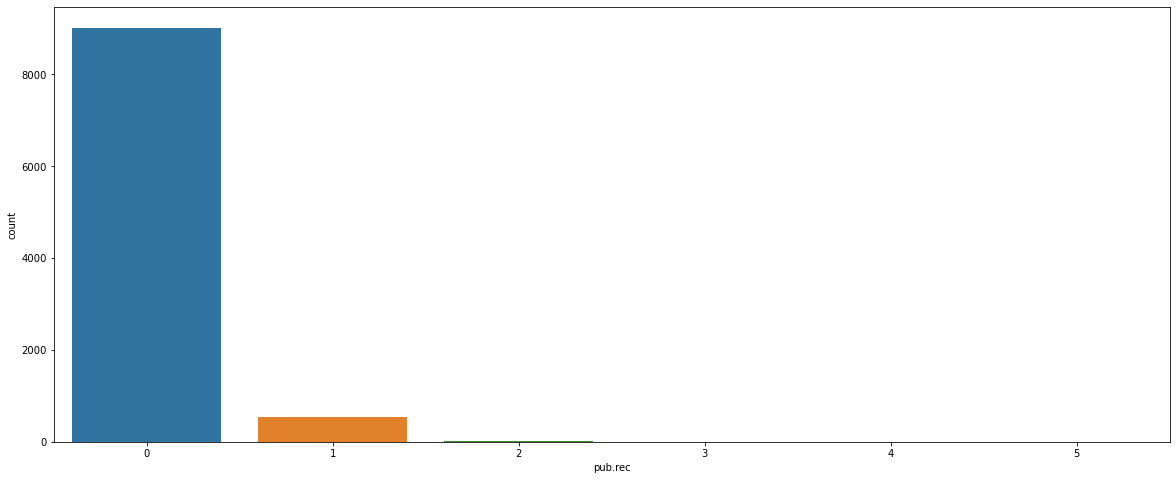

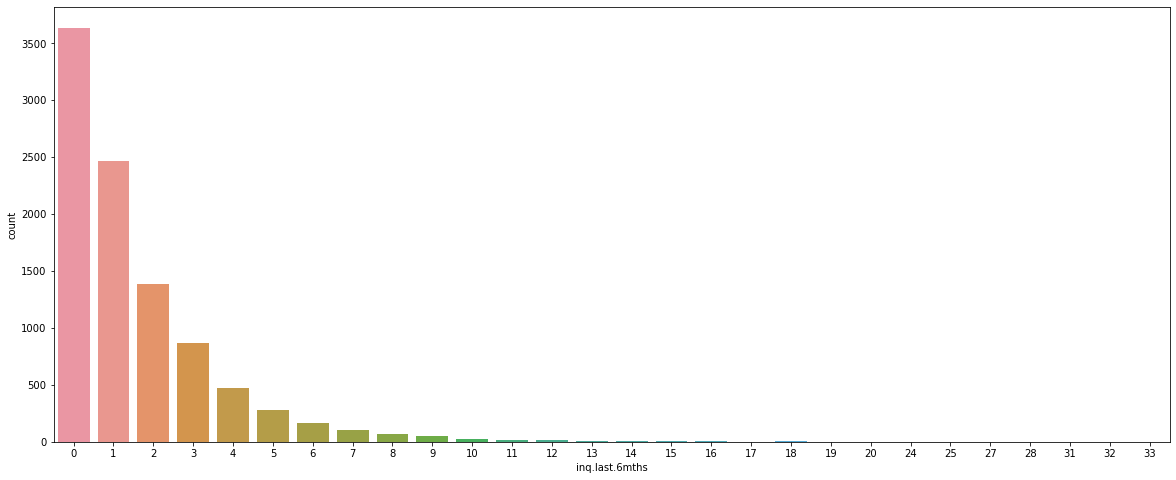

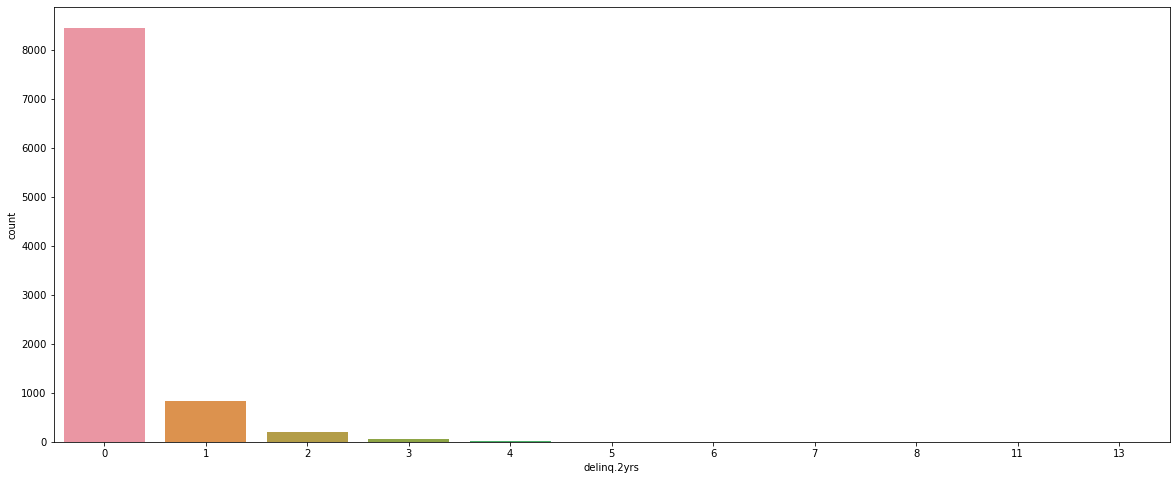

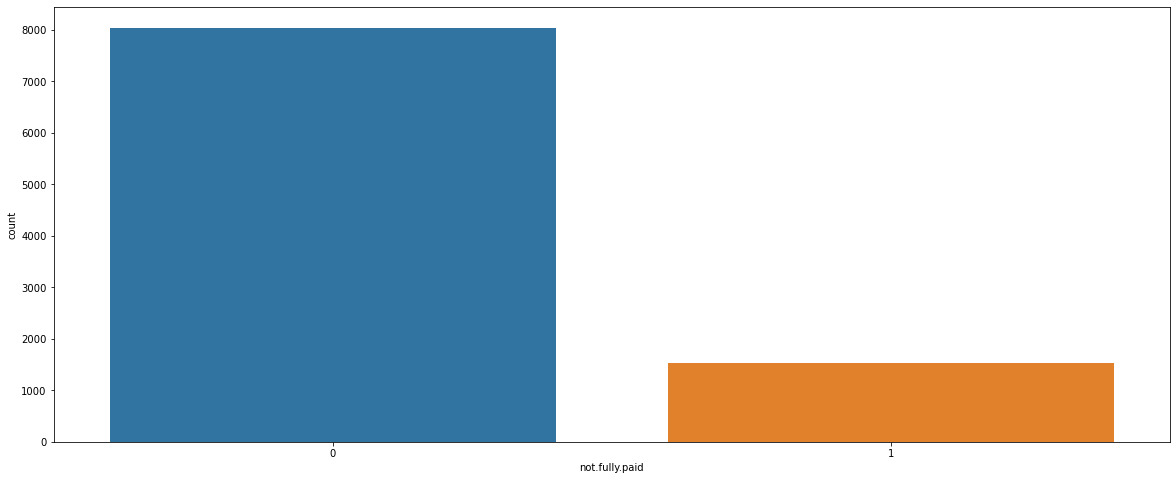

In [250]:
for col in categorical_columns:
    plt.figure(figsize=(20,8))
    sns.countplot(x=col,data=df)
    plt.show()

# Bivariate Analysis

### TV and IDV

In [251]:
# Target Variable Vs Indpendant varialbe

# not.fully.paid vs Other variables

In [252]:
# Target vs Continuous data

# categorical vs continuous data

# box plots

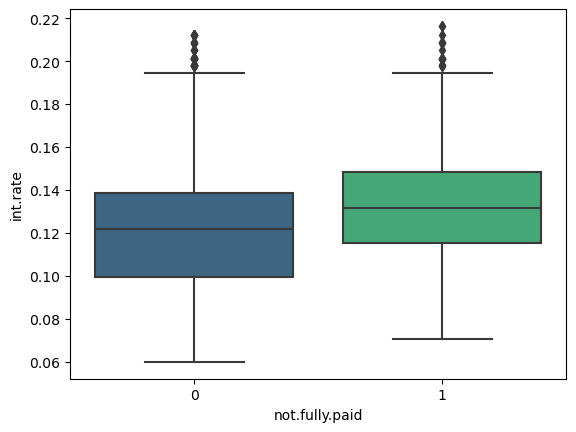

################################################################################


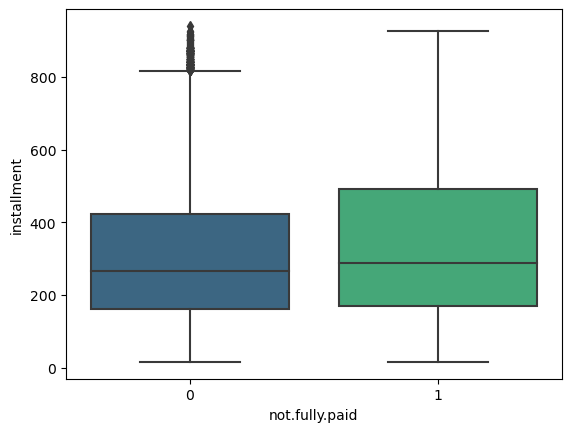

################################################################################


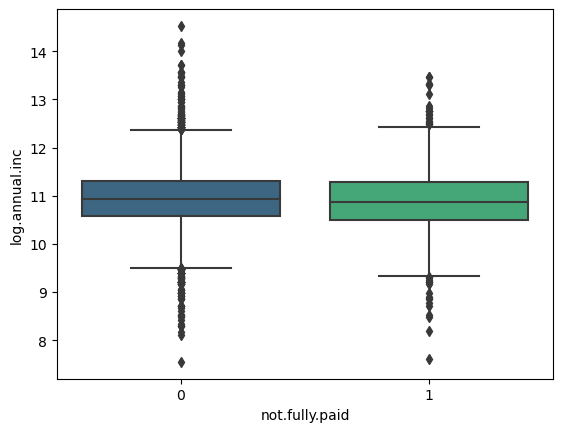

################################################################################


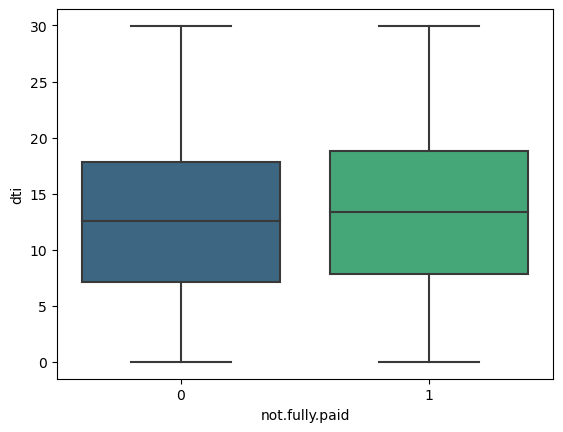

################################################################################


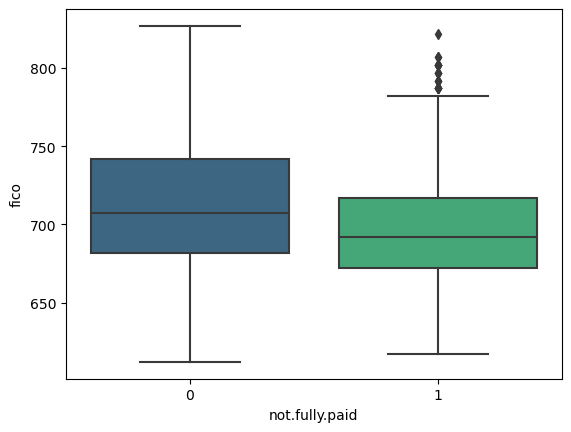

################################################################################


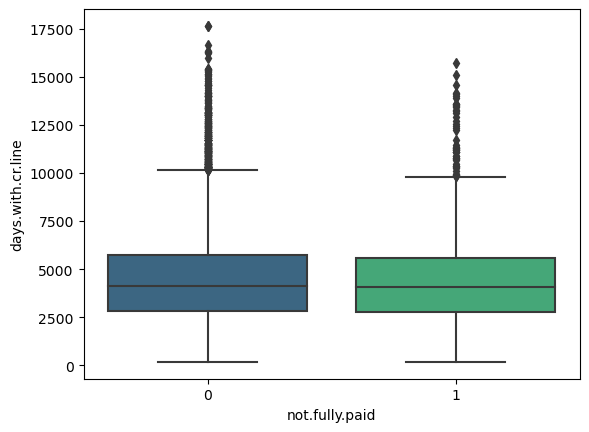

################################################################################


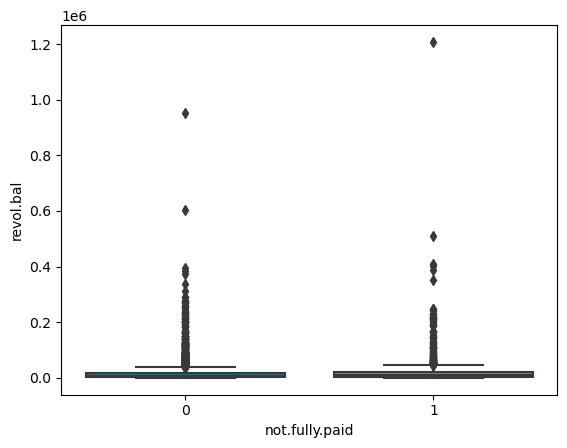

################################################################################


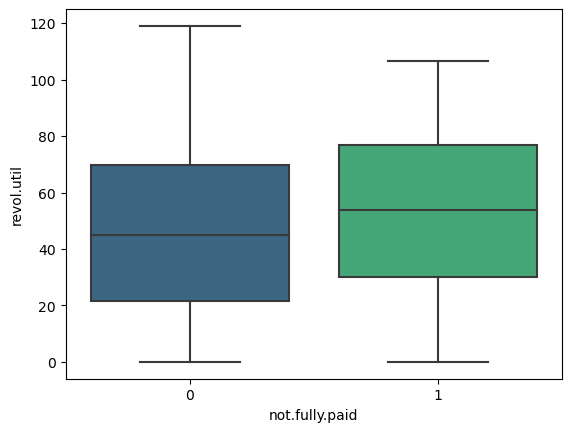

################################################################################


In [20]:
for col in numerical_columns:
    sns.boxplot(x='not.fully.paid',y=col,data=df,palette='viridis')
    plt.show()
    print("#"*80)

In [254]:
# customer does not fully pay load if interest rates are high, installments are more, fico score is less

In [255]:
# Target vs Categorical data
# Categorical vs Categorical

# Stacked bar chart

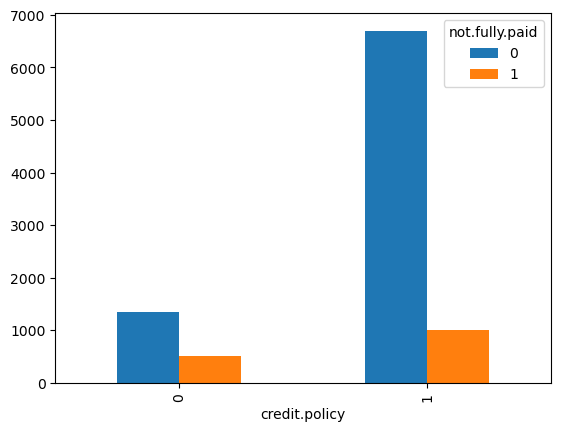

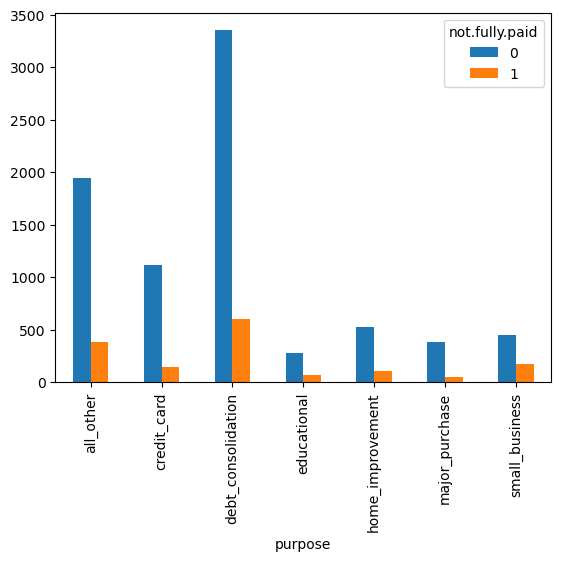

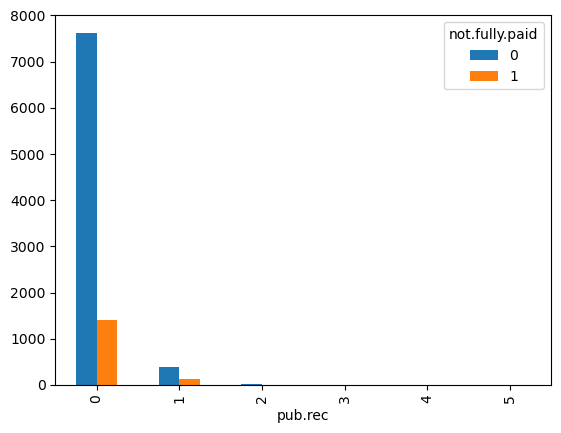

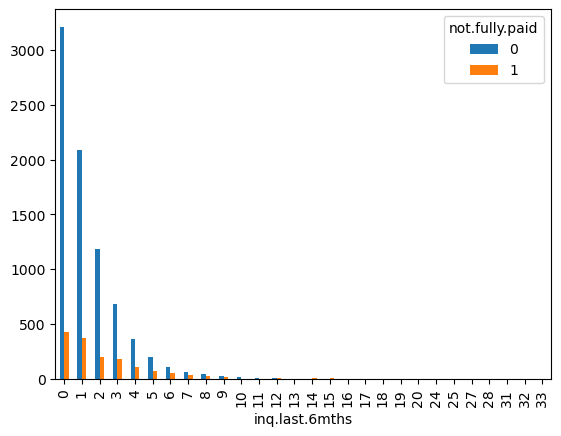

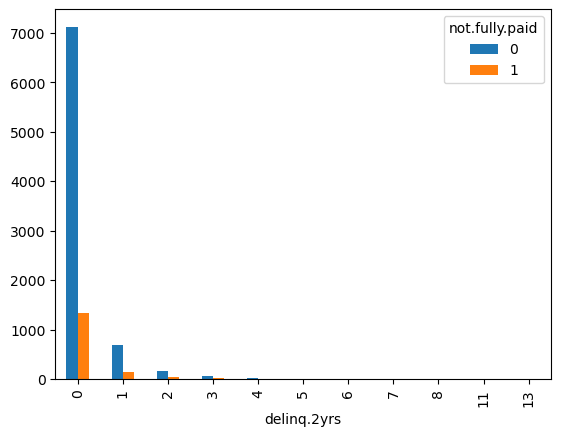

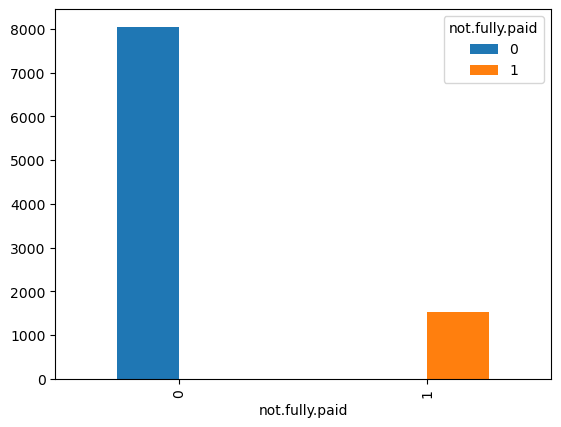

In [21]:
for col in categorical_columns:
    pd.crosstab(df[col],df['not.fully.paid']).plot(kind='bar')
    plt.show()

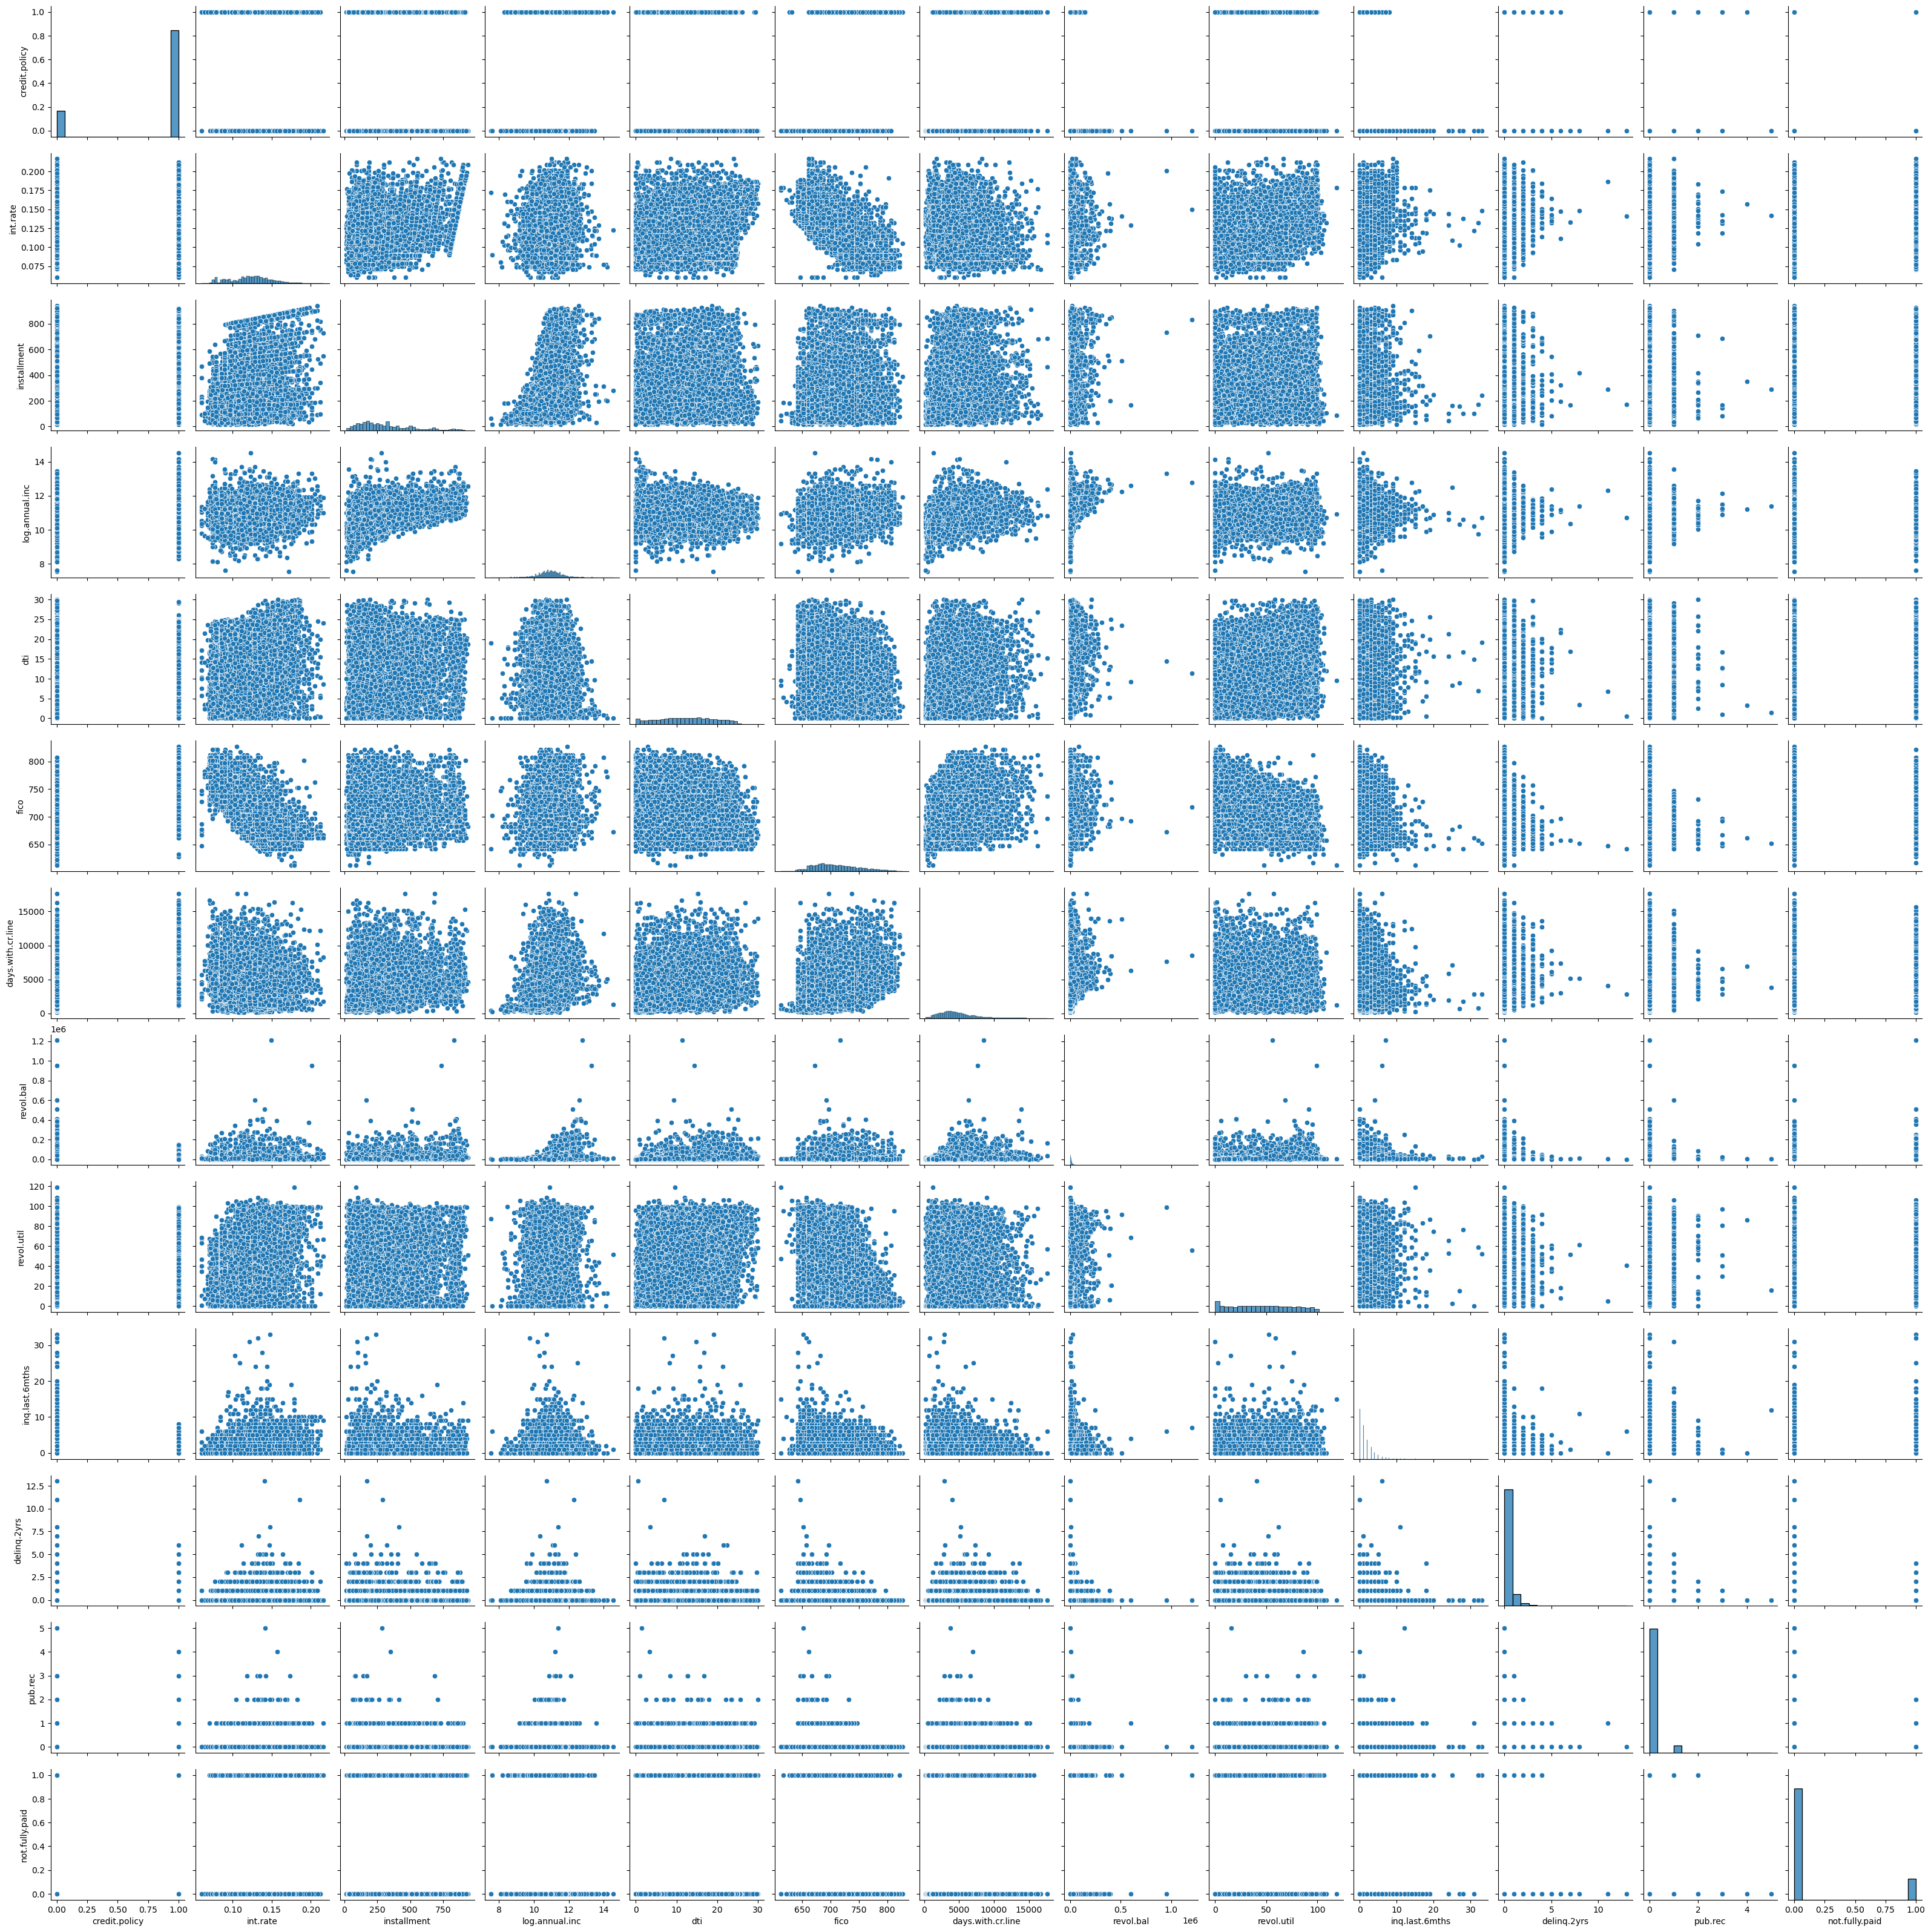

In [22]:
sns.pairplot(df)

In [257]:
# if borrower make due payment in first 2 years, he has more chances to default
# loan taken for debit consolidation has more chance to default
# borrower having less queries in first 6 monthes have more chances to default.

In [258]:
## Correlation

C:\Users\Ashish Vora\AppData\Local\Temp\ipykernel_8148\3985925948.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.5,cmap='coolwarm', linecolor='Black')


<Axes: >

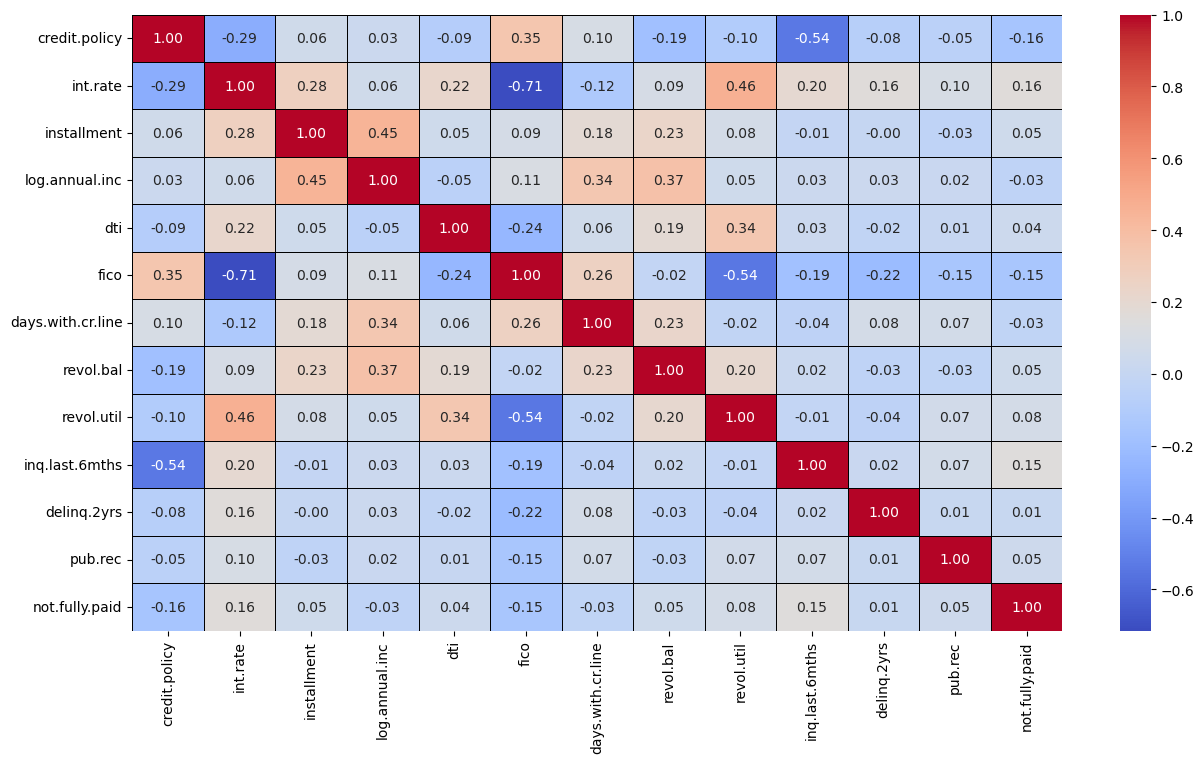

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.5,cmap='coolwarm', linecolor='Black')

In [104]:
# inq.last.6mths and int.rate is postively correlated with not.fully.paid
# fico score and credit.policy are negatively correlated with not.fully.paid

# Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss = StandardScaler()
x_con_scaled = pd.DataFrame(ss.fit_transform(df[numerical_columns]),columns=numerical_columns,index=df.index)
x_con_scaled.head()

int.rate  installment  log.annual.inc       dti      fico  \
0 -0.139318     2.463099        0.680388  0.998505  0.688825   
1 -0.578868    -0.438854        0.244031  0.244540 -0.101303   
2  0.486484     0.230708       -0.908659 -0.141885 -0.759742   
3 -0.813544    -0.757022        0.680388 -0.654697  0.030385   
4  0.743509    -1.043992        0.597961  0.343326 -1.154806   

   days.with.cr.line  revol.bal  revol.util  
0           0.432230   0.353732    0.182704  
1          -0.721230   0.495018    1.030602  
2           0.059770  -0.397073   -0.730683  
3          -0.745277   0.496321    0.909966  
4          -0.198161  -0.360663   -0.251586

# Encoding

In [26]:

x_cat_enc = pd.get_dummies(df['purpose'],drop_first=True) # function to execute one hot encoding
x_cat_enc

credit_card  debt_consolidation  educational  home_improvement  \
0               0                   1            0                 0   
1               1                   0            0                 0   
2               0                   1            0                 0   
3               0                   1            0                 0   
4               1                   0            0                 0   
...           ...                 ...          ...               ...   
9573            0                   0            0                 0   
9574            0                   0            0                 0   
9575            0                   1            0                 0   
9576            0                   0            0                 1   
9577            0                   1            0                 0   

      major_purchase  small_business  
0                  0               0  
1                  0               0  
2                  0               0  
3                  0               0  
4                  0               0  
...              ...             ...  
9573               0               0  
9574               0               0  
9575               0               0  
9576               0               0  
9577               0               0  

[9578 rows x 6 columns]

# Merge Cat and Con data

In [28]:
x_cat =  ['credit.policy','pub.rec', 'inq.last.6mths', 'delinq.2yrs']
df[x_cat]

credit.policy  pub.rec  inq.last.6mths  delinq.2yrs
0                 1        0               0            0
1                 1        0               0            0
2                 1        0               1            0
3                 1        0               1            0
4                 1        0               0            1
...             ...      ...             ...          ...
9573              0        0               2            0
9574              0        0               5            0
9575              0        0               8            0
9576              0        0               5            0
9577              0        0               6            0

[9578 rows x 4 columns]

In [30]:
x_final = pd.concat([x_con_scaled,x_cat_enc, df[x_cat]],axis=1)
x_final

int.rate  installment  log.annual.inc       dti      fico  \
0    -0.139318     2.463099        0.680388  0.998505  0.688825   
1    -0.578868    -0.438854        0.244031  0.244540 -0.101303   
2     0.486484     0.230708       -0.908659 -0.141885 -0.759742   
3    -0.813544    -0.757022        0.680388 -0.654697  0.030385   
4     0.743509    -1.043992        0.597961  0.343326 -1.154806   
...        ...          ...             ...       ...       ...   
9573  0.873884     0.123976        2.031030 -0.322023 -1.023118   
9574  0.099083    -0.296481        0.341170 -1.800898  0.293761   
9575 -0.578868    -1.068670       -0.545694  0.070213 -0.628054   
9576  1.391660     0.156914       -0.182730  0.954924 -0.496366   
9577  0.616859     2.580601        0.540594  0.533633  0.557137   

      days.with.cr.line  revol.bal  revol.util  credit_card  \
0              0.432230   0.353732    0.182704            0   
1             -0.721230   0.495018    1.030602            1   
2              0.059770  -0.397073   -0.730683            0   
3             -0.745277   0.496321    0.909966            0   
4             -0.198161  -0.360663   -0.251586            1   
...                 ...        ...         ...          ...   
9573           2.368325   5.879467    1.216726            0   
9574          -0.072400  -0.495638   -1.575135            0   
9575          -0.444860  -0.203765    1.244300            0   
9576          -1.105722  -0.501089   -1.502753            0   
9577           0.071785   0.621105    0.351594            0   

      debt_consolidation  educational  home_improvement  major_purchase  \
0                      1            0                 0               0   
1                      0            0                 0               0   
2                      1            0                 0               0   
3                      1            0                 0               0   
4                      0            0                 0               0   
...                  ...          ...               ...             ...   
9573                   0            0                 0               0   
9574                   0            0                 0               0   
9575                   1            0                 0               0   
9576                   0            0                 1               0   
9577                   1            0                 0               0   

      small_business  credit.policy  pub.rec  inq.last.6mths  delinq.2yrs  
0                  0              1        0               0            0  
1                  0              1        0               0            0  
2                  0              1        0               1            0  
3                  0              1        0               1            0  
4                  0              1        0               0            1  
...              ...            ...      ...             ...          ...  
9573               0              0        0               2            0  
9574               0              0        0               5            0  
9575               0              0        0               8            0  
9576               0              0        0               5            0  
9577               0              0        0               6            0  

[9578 rows x 18 columns]

# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
y=df['not.fully.paid']

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x_final,y,test_size=0.2,random_state=13)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(7662, 18) (7662,)
(1916, 18) (1916,)


# Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt_classfier = DecisionTreeClassifier(criterion='gini')
dt_classfier.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
from sklearn import tree

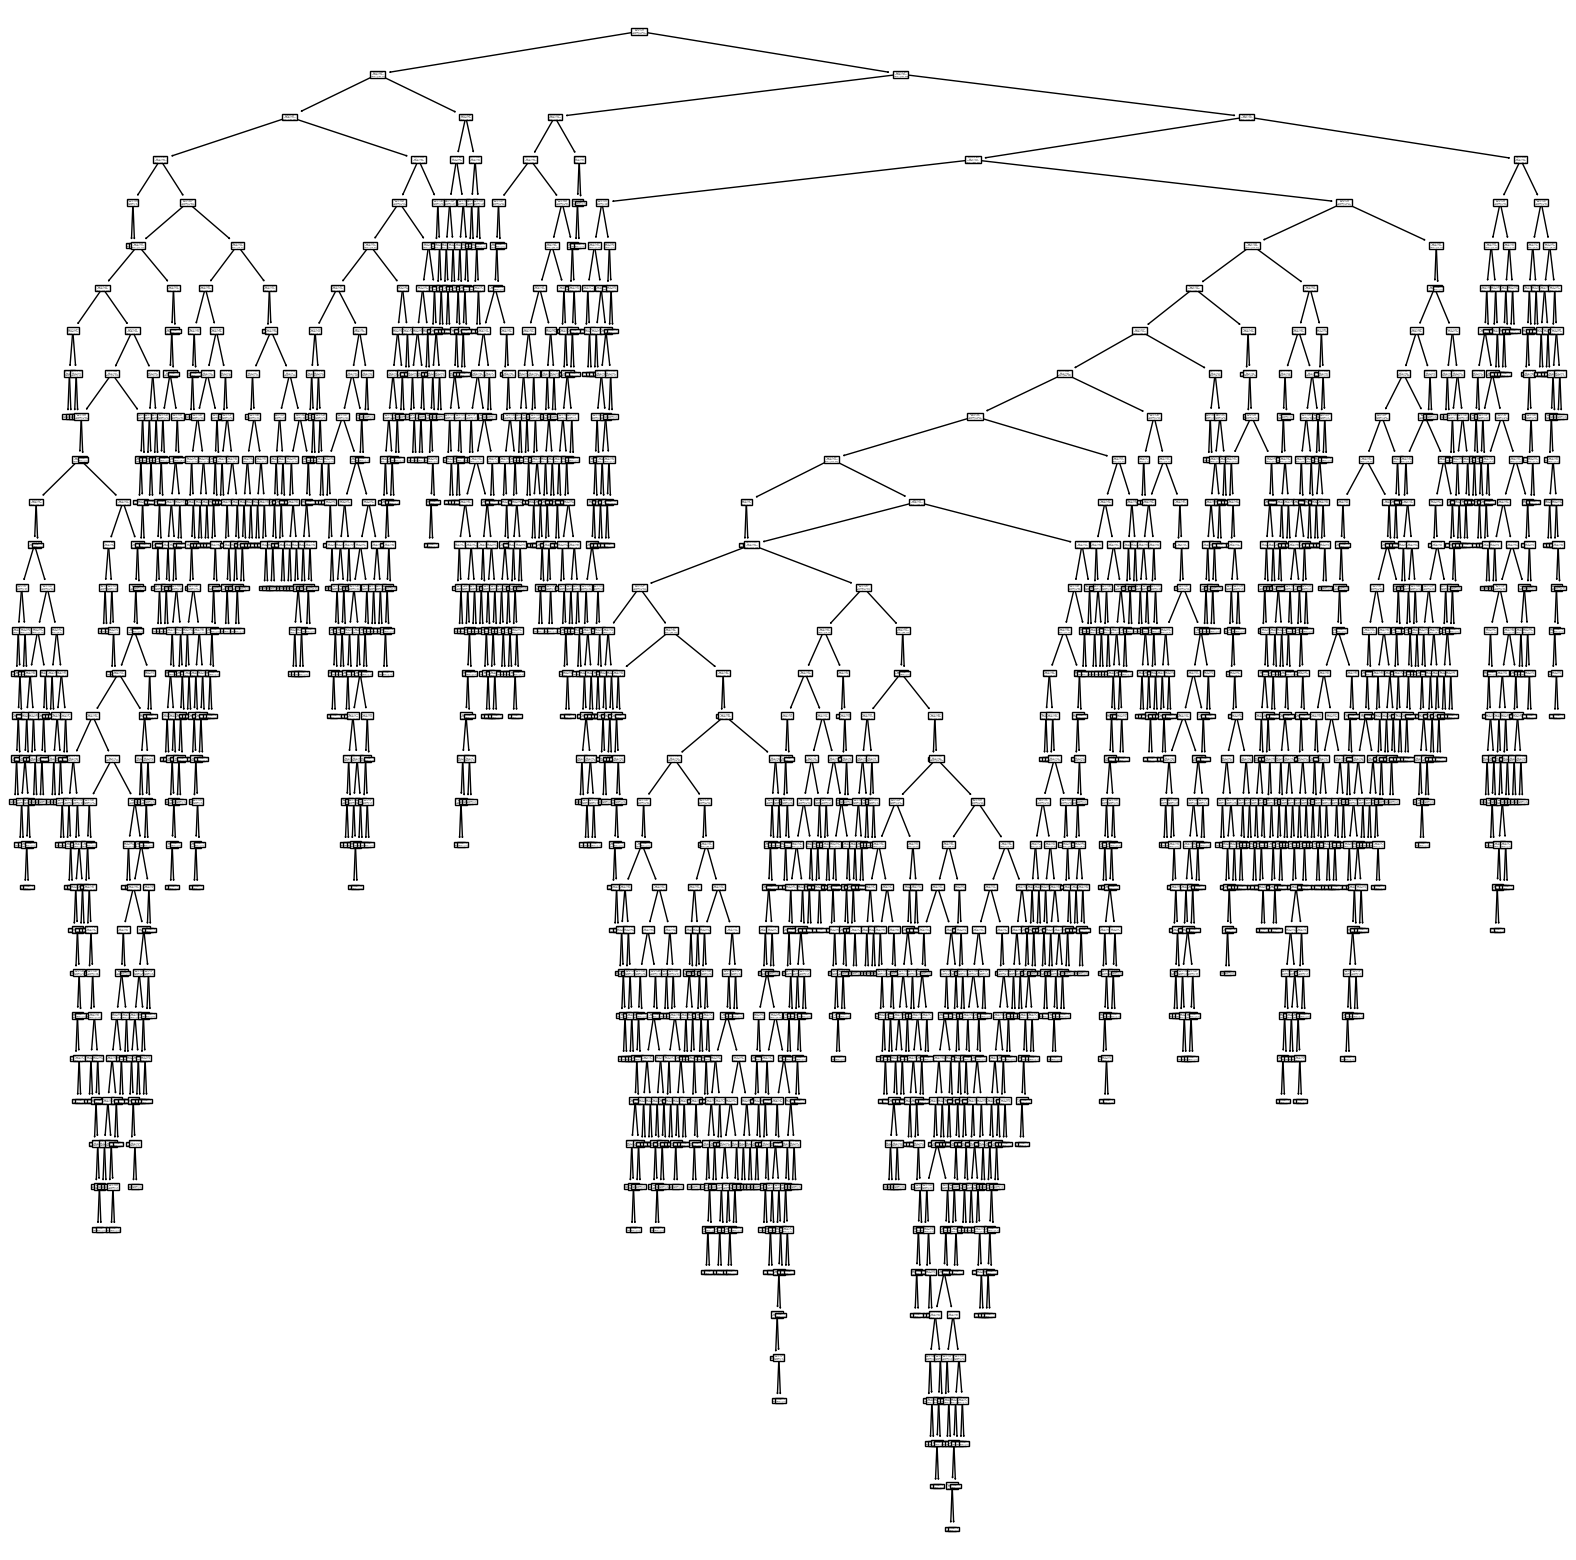

In [46]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_classfier)
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

In [48]:
y_train_pred = dt_classfier.predict(x_train)
y_test_pred = dt_classfier.predict(x_test)

Train confusion Matrix:


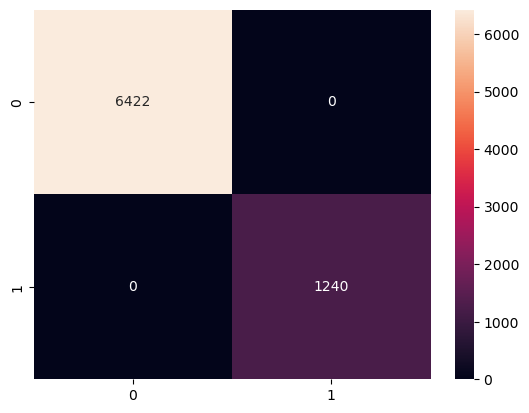

Test confusion Matrix:


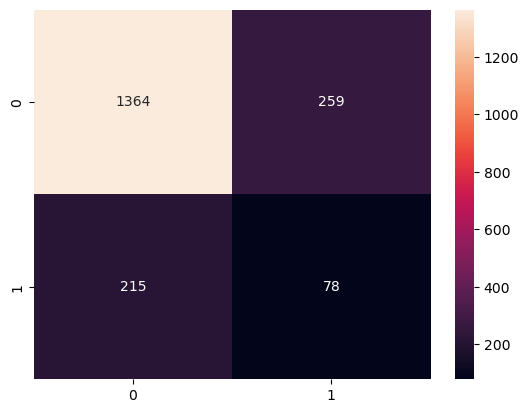

In [49]:
print('Train confusion Matrix:')
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt=".0f")
plt.show()
print('Test confusion Matrix:')
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f")
plt.show()

In [50]:
print('Train Classification Report:')
print(classification_report(y_train,y_train_pred))
print("-"*100)
print('Test Classification Matrix:')
print(classification_report(y_test,y_test_pred))

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6422
           1       1.00      1.00      1.00      1240

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662

----------------------------------------------------------------------------------------------------
Test Classification Matrix:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1623
           1       0.23      0.27      0.25       293

    accuracy                           0.75      1916
   macro avg       0.55      0.55      0.55      1916
weighted avg       0.77      0.75      0.76      1916



In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
scores = cross_val_score(dt_classfier,x_train,y_train,scoring='recall',cv=5)
print('Score:',scores)
print('Avg Score:',np.mean(scores))
print('Std Score:',np.std(scores))

Score: [0.21774194 0.32258065 0.22177419 0.31048387 0.20564516]
Avg Score: 0.25564516129032255
Std Score: 0.05014287598938649


# Hyperparameter Tuning for Decision Tree Classifier

In [53]:
grid = {'max_depth':range(1,10),'min_samples_split':range(4,8,1),
       'max_leaf_nodes':range(3,10,1)}

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
grid_src = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),param_grid=grid,cv=5,
            scoring='recall')
grid_src.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(3, 10),
                         'min_samples_split': range(4, 8)},
             scoring='recall')

In [56]:
pd.DataFrame(grid_src.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.008703      0.002880         0.003448        0.001960   
1         0.010080      0.000214         0.001021        0.002042   
2         0.006269      0.002009         0.003888        0.002072   
3         0.010266      0.000495         0.000618        0.001235   
4         0.008714      0.001599         0.002729        0.004087   
..             ...           ...              ...             ...   
247       0.035407      0.006903         0.003132        0.003423   
248       0.031969      0.002120         0.004857        0.000735   
249       0.033003      0.002832         0.003302        0.001830   
250       0.031709      0.001230         0.001002        0.002004   
251       0.030679      0.000227         0.004010        0.002005   

    param_max_depth param_max_leaf_nodes param_min_samples_split  \
0                 1                    3                       4   
1                 1                    3                       5   
2                 1                    3                       6   
3                 1                    3                       7   
4                 1                    4                       4   
..              ...                  ...                     ...   
247               9                    8                       7   
248               9                    9                       4   
249               9                    9                       5   
250               9                    9                       6   
251               9                    9                       7   

                                                params  split0_test_score  \
0    {'max_depth': 1, 'max_leaf_nodes': 3, 'min_sam...           0.923387   
1    {'max_depth': 1, 'max_leaf_nodes': 3, 'min_sam...           0.923387   
2    {'max_depth': 1, 'max_leaf_nodes': 3, 'min_sam...           0.923387   
3    {'max_depth': 1, 'max_leaf_nodes': 3, 'min_sam...           0.923387   
4    {'max_depth': 1, 'max_leaf_nodes': 4, 'min_sam...           0.923387   
..                                                 ...                ...   
247  {'max_depth': 9, 'max_leaf_nodes': 8, 'min_sam...           0.588710   
248  {'max_depth': 9, 'max_leaf_nodes': 9, 'min_sam...           0.588710   
249  {'max_depth': 9, 'max_leaf_nodes': 9, 'min_sam...           0.588710   
250  {'max_depth': 9, 'max_leaf_nodes': 9, 'min_sam...           0.588710   
251  {'max_depth': 9, 'max_leaf_nodes': 9, 'min_sam...           0.588710   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.939516           0.943548           0.939516   
1             0.939516           0.943548           0.939516   
2             0.939516           0.943548           0.939516   
3             0.939516           0.943548           0.939516   
4             0.939516           0.943548           0.939516   
..                 ...                ...                ...   
247           0.467742           0.552419           0.512097   
248           0.548387           0.620968           0.540323   
249           0.548387           0.620968           0.540323   
250           0.548387           0.620968           0.540323   
251           0.548387           0.620968           0.540323   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.310484         0.811290        0.250499                1  
1             0.310484         0.811290        0.250499                1  
2             0.310484         0.811290        0.250499                1  
3             0.310484         0.811290        0.250499                1  
4             0.310484         0.811290        0.250499                1  
..                 ...              ...             ...              ...  
247           0.512097         0.526613        0.041010              109  
248           0.588710         0.577419        0.029565          

In [57]:
grid_src.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=1, max_leaf_nodes=3,
                       min_samples_split=4)

In [58]:
dt_tunned = DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=8,
                                  min_samples_split=5,class_weight='balanced')
dt_tunned.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=8,
                       min_samples_split=5)

In [59]:
y_train_pred = dt_tunned.predict(x_train)
y_test_pred = dt_tunned.predict(x_test)

Train confusion Matrix:


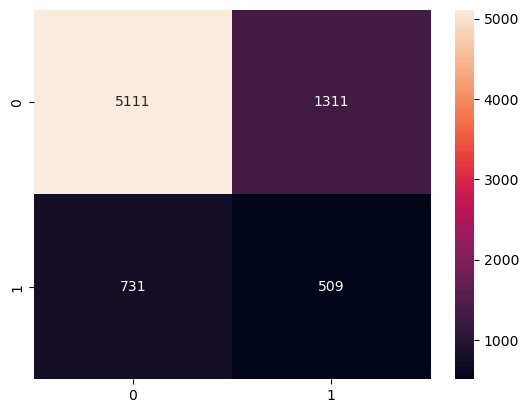

Test confusion Matrix:


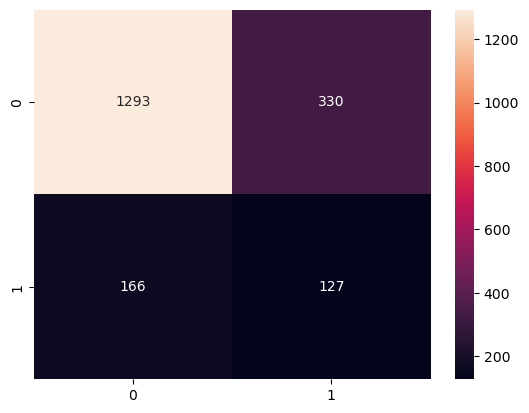

In [60]:
print('Train confusion Matrix:')
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt=".0f")
plt.show()
print('Test confusion Matrix:')
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f")
plt.show()

In [61]:
print('Train Classification Report:')
print(classification_report(y_train,y_train_pred))
print("-"*100)
print('Test Classification Matrix:')
print(classification_report(y_test,y_test_pred))

Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      6422
           1       0.28      0.41      0.33      1240

    accuracy                           0.73      7662
   macro avg       0.58      0.60      0.58      7662
weighted avg       0.78      0.73      0.75      7662

----------------------------------------------------------------------------------------------------
Test Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1623
           1       0.28      0.43      0.34       293

    accuracy                           0.74      1916
   macro avg       0.58      0.62      0.59      1916
weighted avg       0.79      0.74      0.76      1916



In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
scores = cross_val_score(dt_tunned,x_train,y_train,scoring='recall',cv=5)
print('Score:',scores)
print('Avg Score:',np.mean(scores))
print('Std Score:',np.std(scores))

Score: [0.35887097 0.39516129 0.52419355 0.41129032 0.38306452]
Avg Score: 0.4145161290322581
Std Score: 0.057445173608090726


# Bagging Classfier

In [64]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [65]:
bag_class_log = BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced'),
                             n_estimators=20,max_samples=0.8,max_features=0.5,
                              bootstrap=True,bootstrap_features=False
                         )
bag_class_log.fit(x_train,y_train)

C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced'),
                  max_features=0.5, max_samples=0.8, n_estimators=20)

In [66]:
y_train_pred = bag_class_log.predict(x_train)
y_test_pred = bag_class_log.predict(x_test)

Train confusion Matrix:


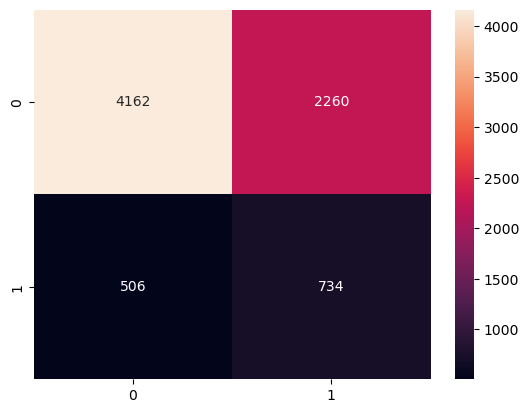

Test confusion Matrix:


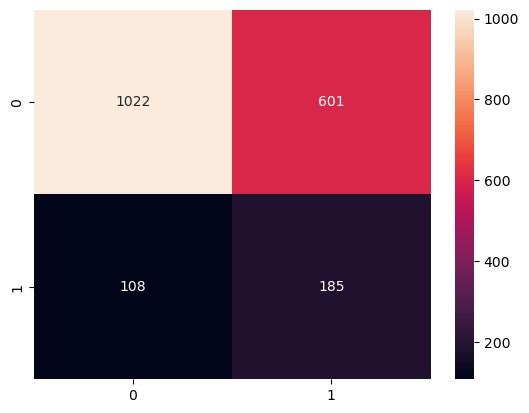

In [67]:
print('Train confusion Matrix:')
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt=".0f")
plt.show()
print('Test confusion Matrix:')
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f")
plt.show()

In [68]:
print('Train Classification Report:')
print(classification_report(y_train,y_train_pred))
print("-"*100)
print('Test Classification Matrix:')
print(classification_report(y_test,y_test_pred))

Train Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75      6422
           1       0.25      0.59      0.35      1240

    accuracy                           0.64      7662
   macro avg       0.57      0.62      0.55      7662
weighted avg       0.79      0.64      0.69      7662

----------------------------------------------------------------------------------------------------
Test Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.63      0.74      1623
           1       0.24      0.63      0.34       293

    accuracy                           0.63      1916
   macro avg       0.57      0.63      0.54      1916
weighted avg       0.80      0.63      0.68      1916



In [69]:
scores = cross_val_score(bag_class_log,x_train,y_train,scoring='recall',cv=5)
print('Score:',scores)
print('Avg Score:',np.mean(scores))
print('Std Score:',np.std(scores))

C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Score: [0.54435484 0.54435484 0.57258065 0.62096774 0.60080645]
Avg Score: 0.5766129032258064
Std Score: 0.03049624258256298


# Implementation of Randomforest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier(n_estimators=150,criterion='gini',max_depth=5,
                          max_leaf_nodes=8,max_samples=0.7,
                           max_features=0.5,bootstrap=True,class_weight='balanced')
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.5,
                       max_leaf_nodes=8, max_samples=0.7, n_estimators=150)

In [72]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

Train confusion Matrix:


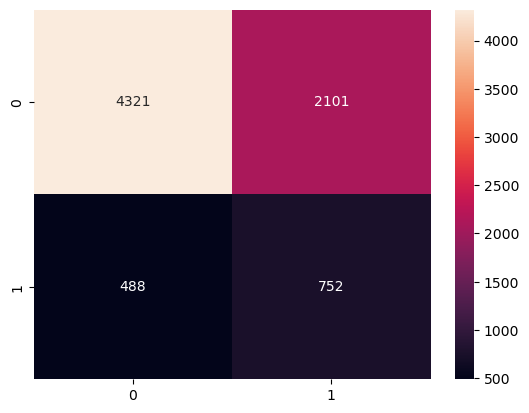

Test confusion Matrix:


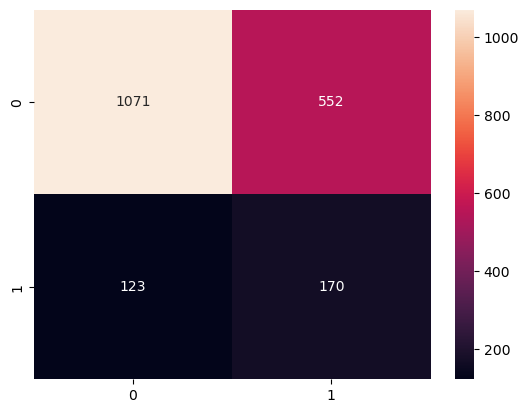

In [73]:
print('Train confusion Matrix:')
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt=".0f")
plt.show()
print('Test confusion Matrix:')
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f")
plt.show()

In [74]:
print('Train Classification Report:')
print(classification_report(y_train,y_train_pred))
print("-"*100)
print('Test Classification Matrix:')
print(classification_report(y_test,y_test_pred))

Train Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      6422
           1       0.26      0.61      0.37      1240

    accuracy                           0.66      7662
   macro avg       0.58      0.64      0.57      7662
weighted avg       0.80      0.66      0.70      7662

----------------------------------------------------------------------------------------------------
Test Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1623
           1       0.24      0.58      0.33       293

    accuracy                           0.65      1916
   macro avg       0.57      0.62      0.55      1916
weighted avg       0.80      0.65      0.70      1916



In [75]:
scores = cross_val_score(rf,x_train,y_train,scoring='recall',cv=5)
print('Score:',scores)
print('Avg Score:',np.mean(scores))
print('Std Score:',np.std(scores))

Score: [0.58064516 0.55645161 0.59274194 0.61693548 0.5483871 ]
Avg Score: 0.5790322580645161
Std Score: 0.02480412338585438
